In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor


In [17]:
# Read the CSV file into a DataFrame

df_db = pd.read_csv('rf_nooutliers.csv')
df_ram = pd.read_csv('xgb_nooutlier_ram_usage.csv')

df_db = df_db.sort_values(by=['publisher_number', 'subscriber_number', 'message_size', 'retain', 'qos', 'topics'])
df_ram = df_ram.sort_values(by=['publisher_number', 'subscriber_number', 'message_size', 'retain', 'qos', 'topics'])


# Display the first few rows of the DataFrame
display(df_db.head())
display(df_ram.head()) 


,publisher_number,subscriber_number,message_size,retain,qos,topics,predicted_database_size
30,1,1,1,0,0,1,1.997167
31,1,1,1,0,0,2,1.997167
32,1,1,1,0,0,3,1.997167
33,1,1,1,0,0,4,1.997167
34,1,1,1,0,0,5,1.997167


,publisher_number,subscriber_number,message_size,retain,qos,topics,predicted_ram_usage
30,1,1,1,0,0,1,2.219638
31,1,1,1,0,0,2,2.219638
32,1,1,1,0,0,3,2.219638
33,1,1,1,0,0,4,2.219638
34,1,1,1,0,0,5,2.219638


In [18]:
# Find the NaN values in the DataFrame
# There could be NaN values due to some errors during the simulation
print(df_db.isna().sum())
print(df_ram.isna().sum())

# Drop the colums that includes nan in df
df_db = df_db.dropna()
df_ram = df_ram.dropna()

publisher_number           0
subscriber_number          0
message_size               0
retain                     0
qos                        0
topics                     0
predicted_database_size    0
dtype: int64
publisher_number       0
subscriber_number      0
message_size           0
retain                 0
qos                    0
topics                 0
predicted_ram_usage    0
dtype: int64


In [19]:
# Calculate correlation matrix
correlation_matrix_db = df_db.corr()
correlation_matrix_ram = df_ram.corr()

# Display correlation with database_size and ram_usage
# print(correlation_matrix[['database_size', 'ram_usage']])
print(correlation_matrix_db[['predicted_database_size']])
print(correlation_matrix_ram[['predicted_ram_usage']])


                         predicted_database_size
publisher_number                    1.940655e-01
subscriber_number                  -4.370792e-04
message_size                        2.039765e-01
retain                              9.852332e-16
qos                                 2.515152e-01
topics                              3.136656e-15
predicted_database_size             1.000000e+00
                     predicted_ram_usage
publisher_number            4.578453e-01
subscriber_number           1.030458e-03
message_size                9.504575e-02
retain                      1.022101e-15
qos                         1.943918e-01
topics                      5.385603e-15
predicted_ram_usage         1.000000e+00


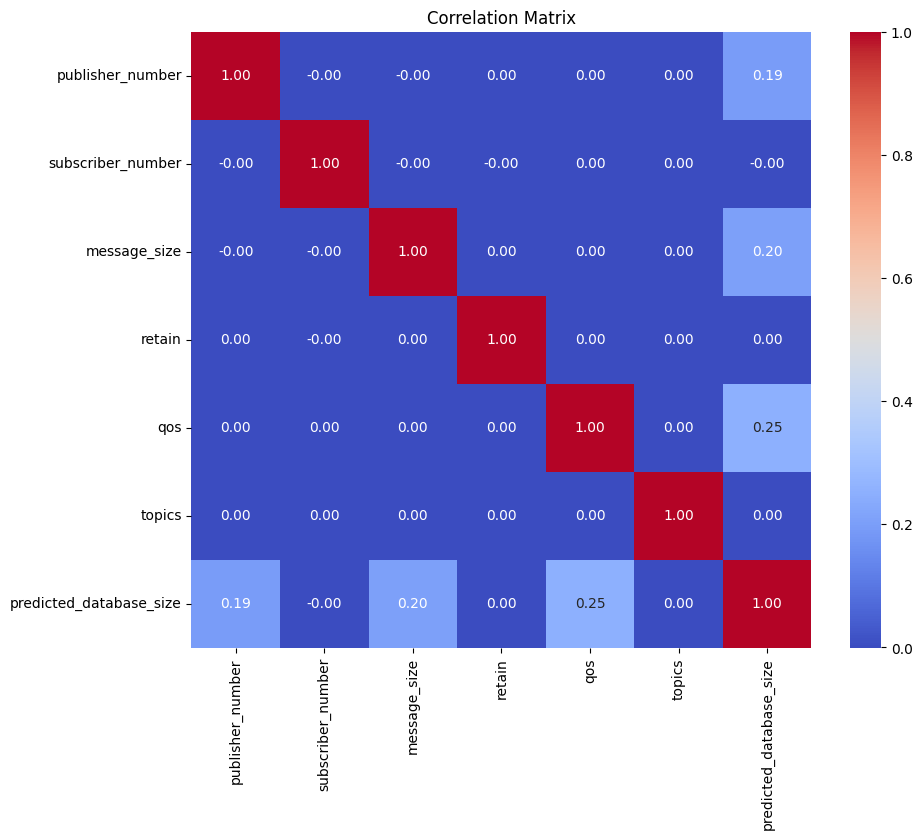

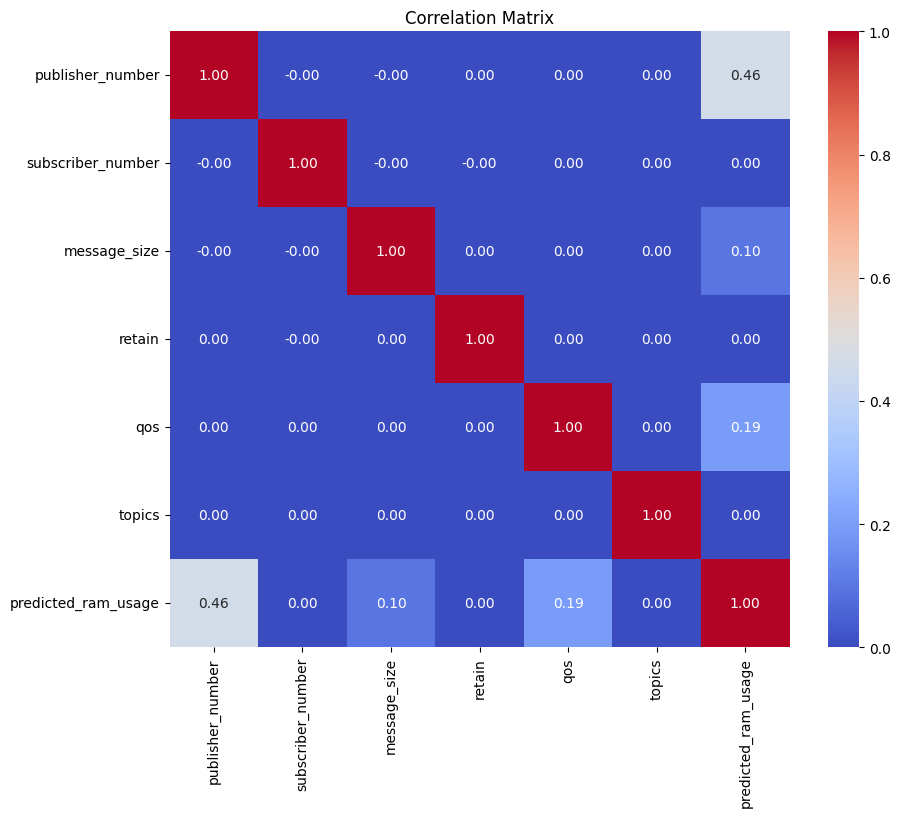

In [20]:
# Plot heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_db, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_ram, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


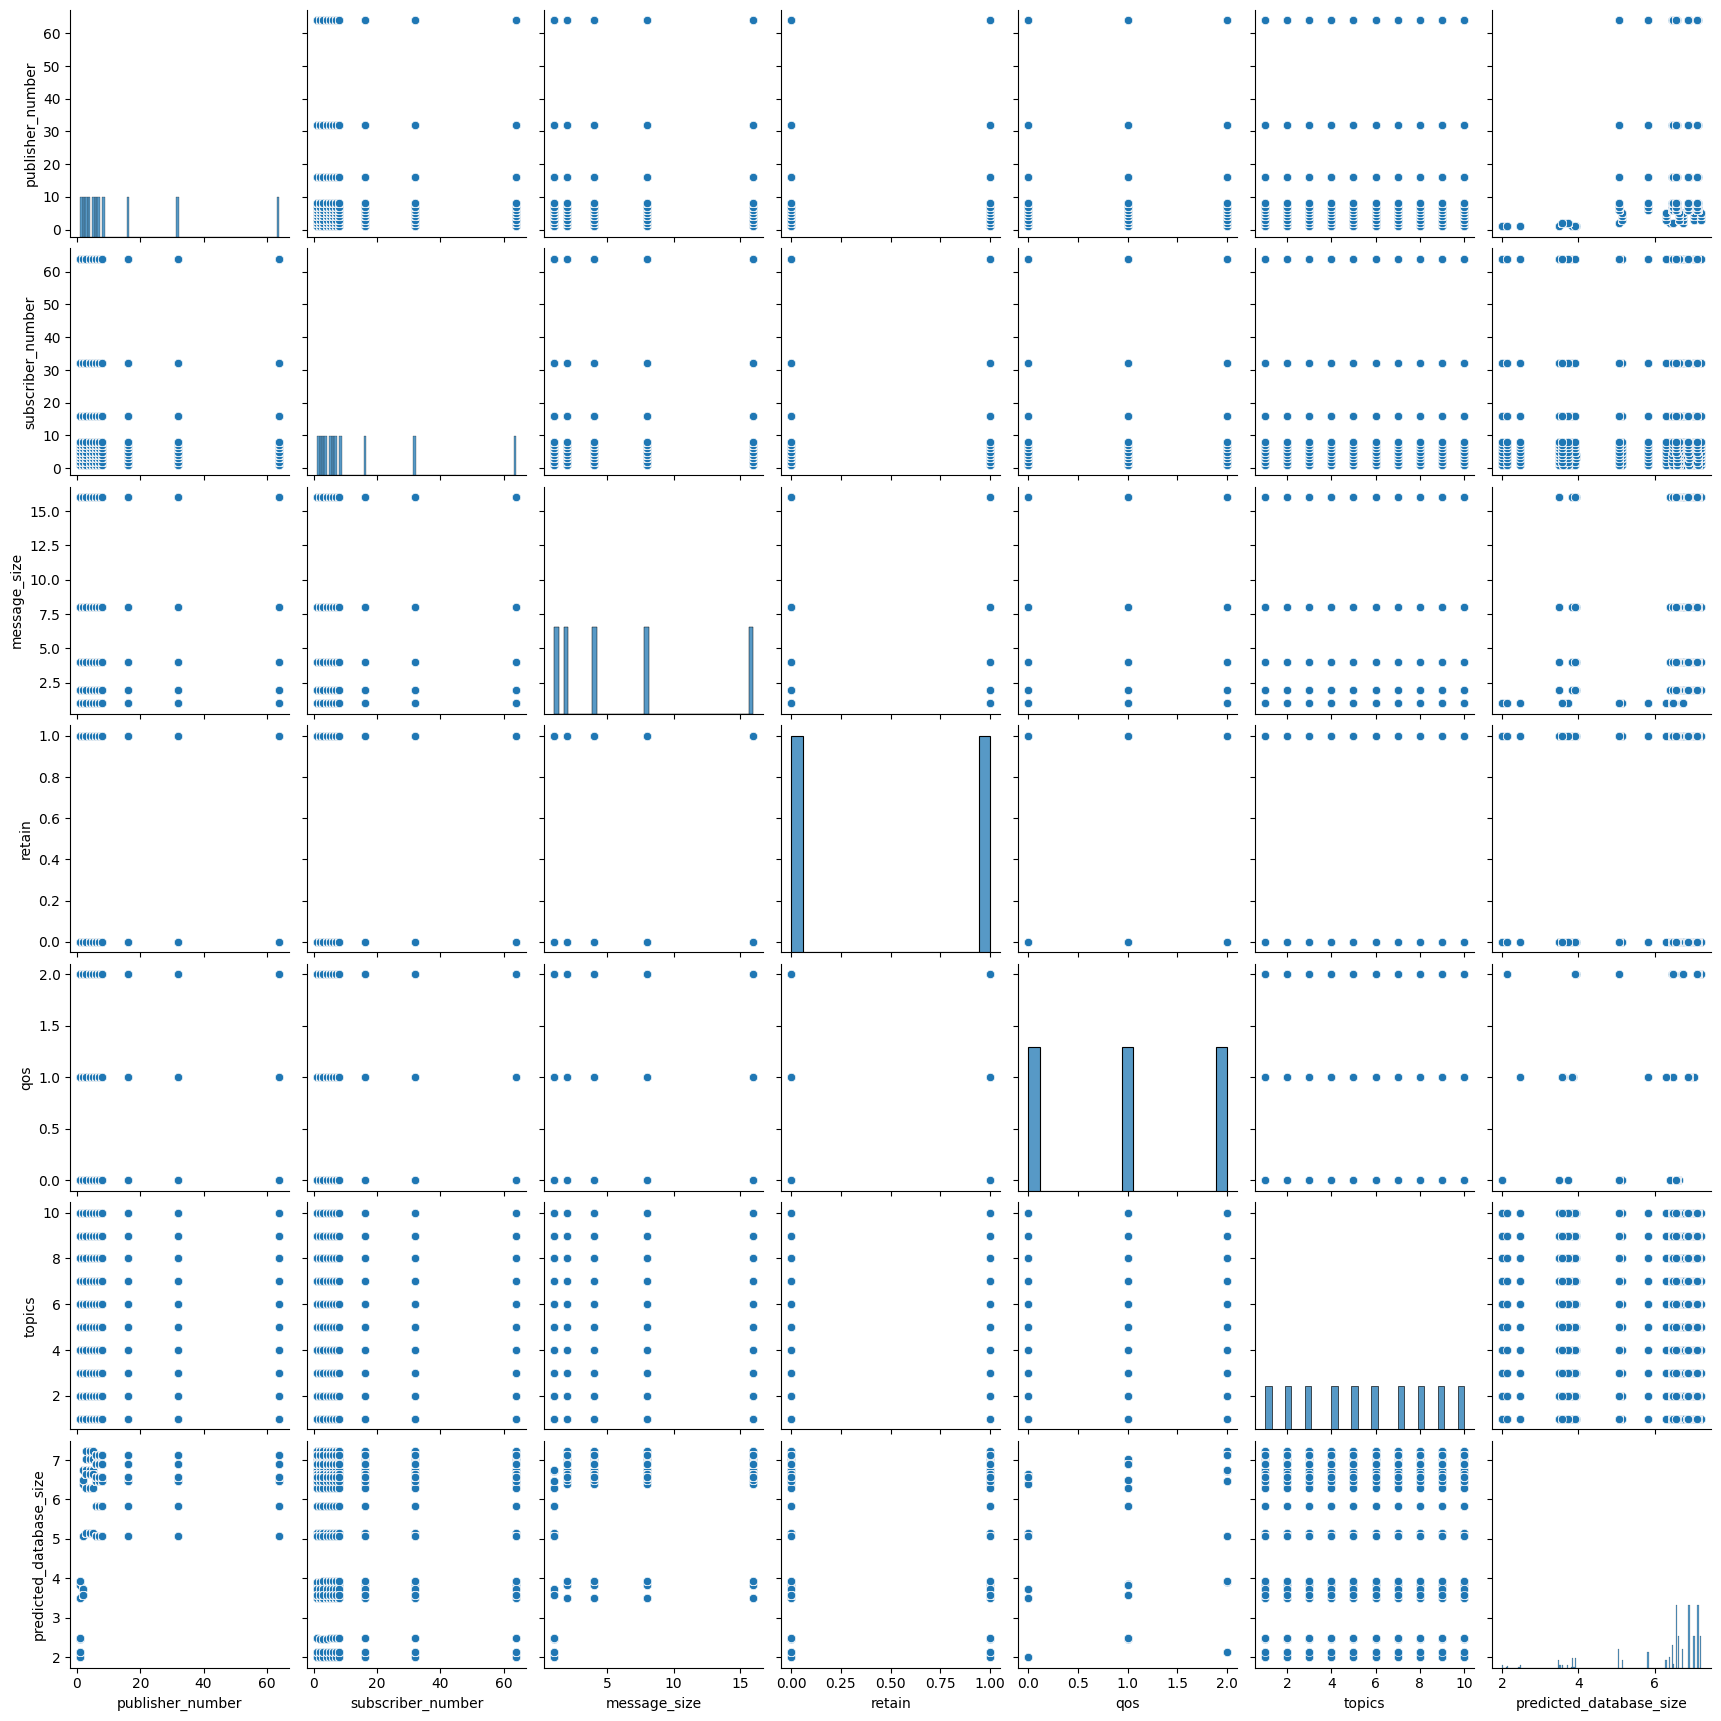

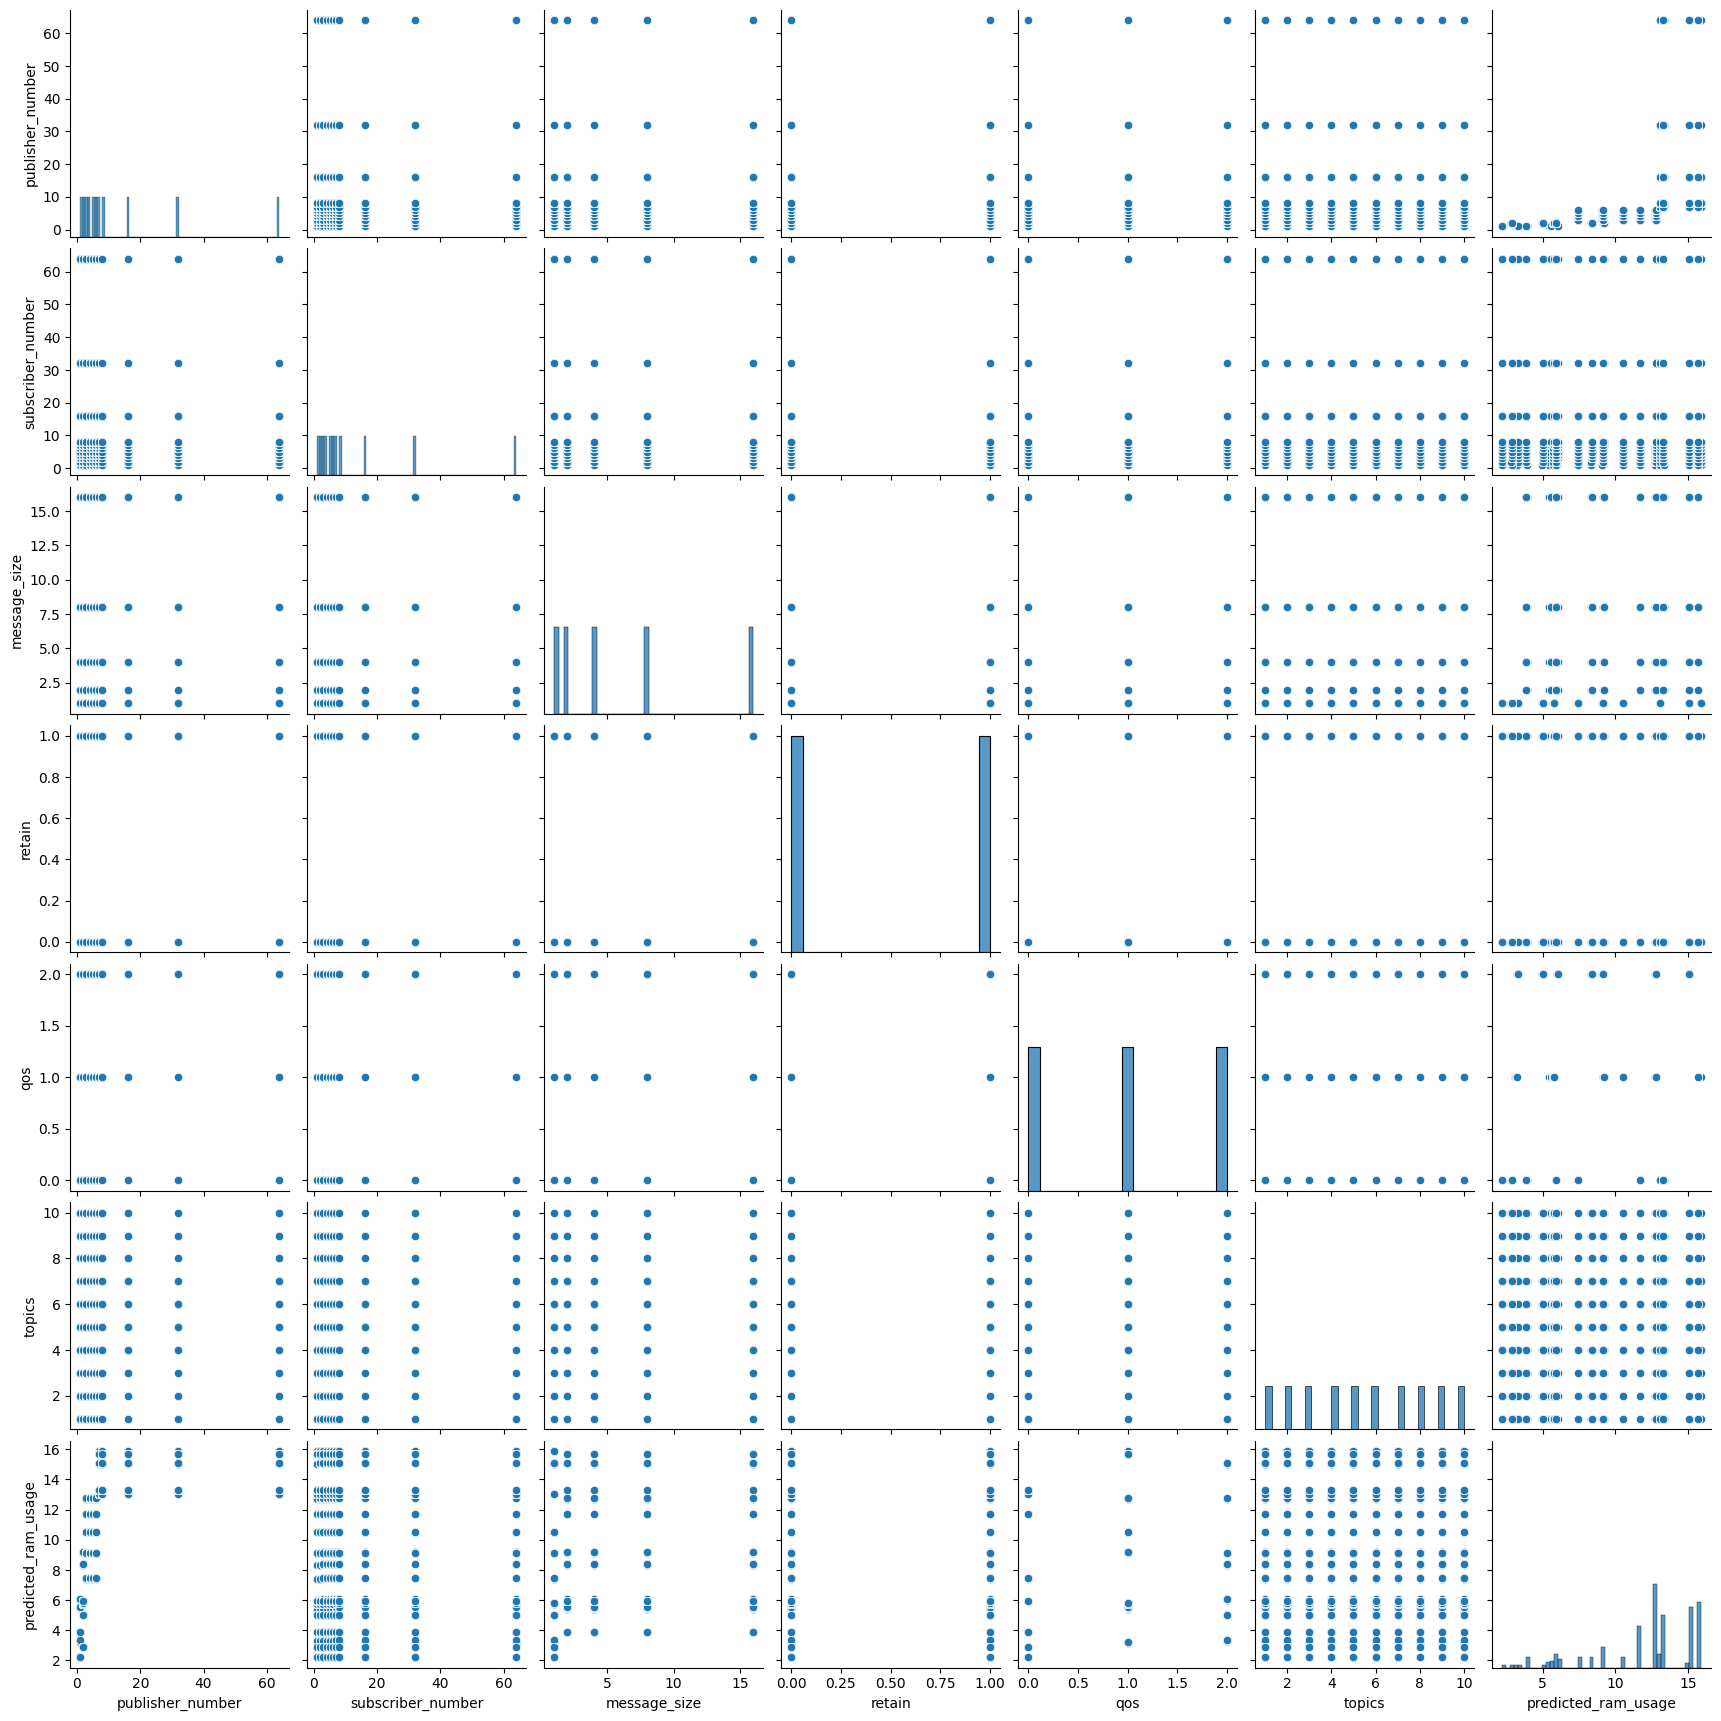

In [21]:
# Create pairplot
sns.pairplot(df_db)
plt.show()

sns.pairplot(df_ram)
plt.show()

   retain  qos  predicted_database_size
0       0    0                 5.977283
1       0    1                 6.380084
2       0    2                 6.663509
3       1    0                 5.977283
4       1    1                 6.380084
5       1    2                 6.663509
   retain  qos  predicted_ram_usage
0       0    0            10.773128
1       0    1            12.842439
2       0    2            12.425979
3       1    0            10.773128
4       1    1            12.842439
5       1    2            12.425979


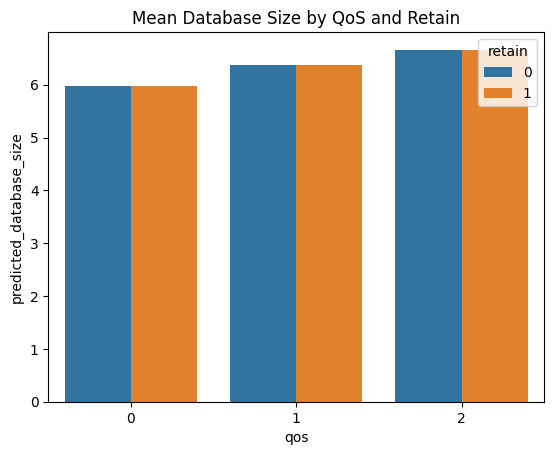

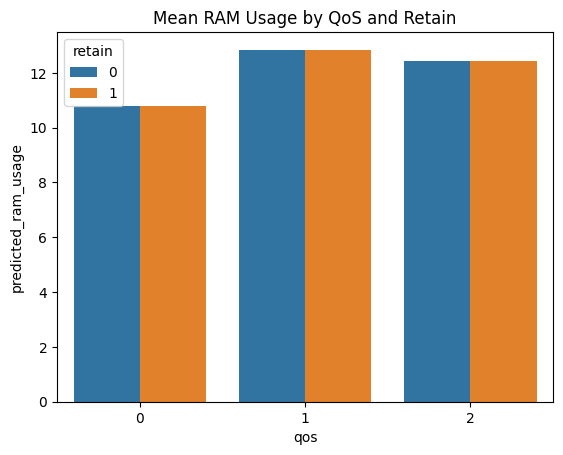

In [22]:
# Group by 'retain' and 'qos', and calculate the mean for 'database_size' and 'ram_usage'
group_means_db = df_db.groupby(['retain', 'qos']).agg({'predicted_database_size': 'mean'}).reset_index()
group_means_ram = df_ram.groupby(['retain', 'qos']).agg({'predicted_ram_usage': 'mean'}).reset_index()

# Display the grouped means
print(group_means_db)
print(group_means_ram)

# Plotting Mean Database Size by QoS and Retain
sns.barplot(data=group_means_db, x='qos', y='predicted_database_size', hue='retain')
plt.title('Mean Database Size by QoS and Retain')
plt.show()

sns.barplot(data=group_means_ram, x='qos', y='predicted_ram_usage', hue='retain')
plt.title('Mean RAM Usage by QoS and Retain')
plt.show()


In [24]:
# Define the feature variables (X) and target variables (y)
X_db = df_db[['publisher_number', 'subscriber_number', 'message_size', 'retain', 'qos', 'topics']]
X_ram = df_ram[['publisher_number', 'subscriber_number', 'message_size', 'retain', 'qos', 'topics']]

y_db = df_db['predicted_database_size']
y_ram = df_ram['predicted_ram_usage']

# Convert categorical variables to numeric
X_db = pd.get_dummies(X_db, drop_first=True)
X_ram = pd.get_dummies(X_ram, drop_first=True)

# Split the data into training and testing sets
X_train_db, X_test_db, y_train_db, y_test_db = train_test_split(X_db, y_db, test_size=0.3, random_state=42)
X_train_ram, X_test_ram, y_train_ram, y_test_ram = train_test_split(X_db, y_ram, test_size=0.3, random_state=42)

# Train the model for database_size
model_db = LinearRegression()
model_db.fit(X_train_db, y_train_db)

model_ram = LinearRegression()
model_ram.fit(X_train_ram, y_train_ram)

# Make predictions for database_size
y_pred_db = model_db.predict(X_test_db)
y_pred_ram = model_ram.predict(X_test_ram)

# Evaluate the models
print(f'Database Size - R^2: {r2_score(y_test_db, y_pred_db)}, RMSE: {mean_squared_error(y_test_db, y_pred_db, squared=False)}')
print(f'RAM Usage - R^2: {r2_score(y_test_ram, y_pred_ram)}, RMSE: {mean_squared_error(y_test_ram, y_pred_ram, squared=False)}')


Database Size - R^2: 0.14627170484585328, RMSE: 1.0337417900242847
RAM Usage - R^2: 0.2593431361167321, RMSE: 2.995122842292144


/Users/tugrul/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/tugrul/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


R^2 Score for Database Size: 1.00
MSE for Database Size: 0.00
R^2 Score for RAM Usage: 1.00
MSE for RAM Usage: 0.00


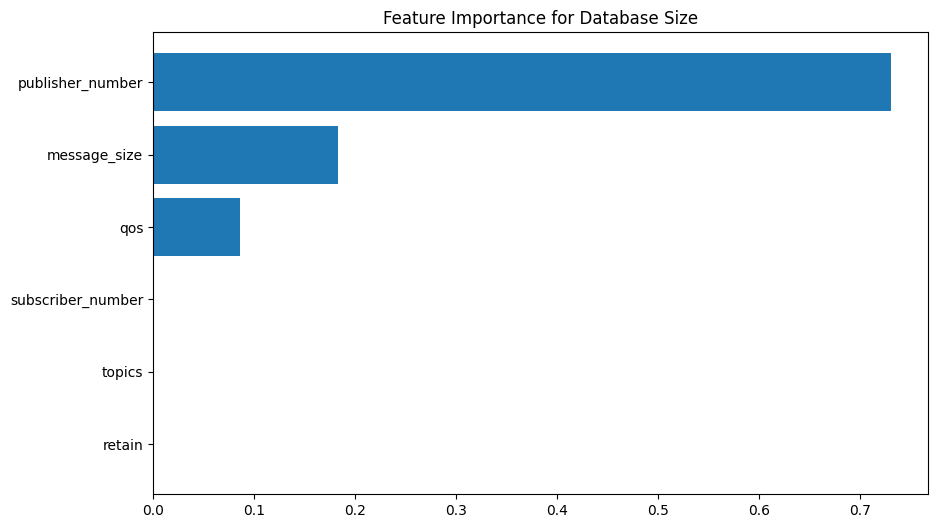

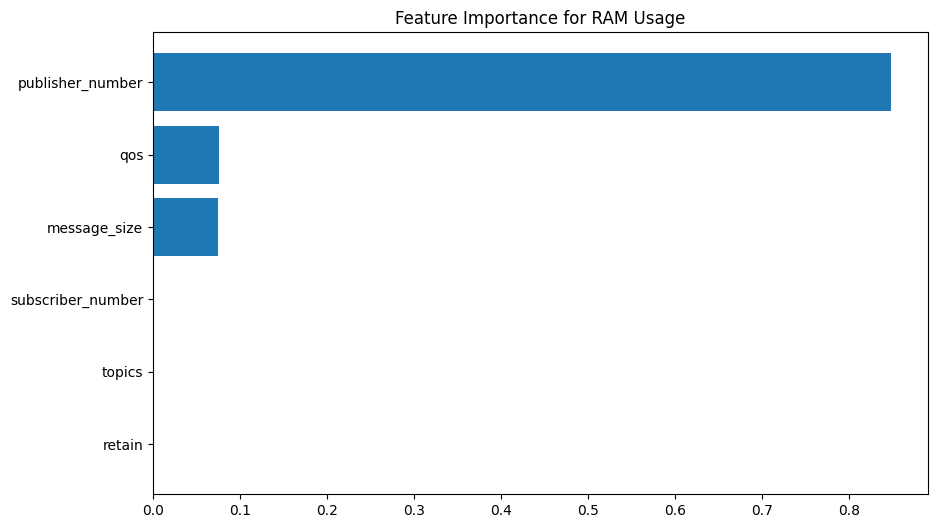

In [25]:
# Train a Random Forest model for database_size
rf_db = RandomForestRegressor(random_state=42)
rf_db.fit(X_train_db, y_train_db)
y_pred_db = rf_db.predict(X_test_db)

rf_ram = RandomForestRegressor(random_state=42)
rf_ram.fit(X_train_ram, y_train_ram)
y_pred_ram = rf_ram.predict(X_test_ram)

# Calculate metrics for database_size
r2_db = r2_score(y_test_db, y_pred_db)
mse_db = mean_squared_error(y_test_db, y_pred_db)
print(f"R^2 Score for Database Size: {r2_db:.2f}")
print(f"MSE for Database Size: {mse_db:.2f}")

# Calculate metrics for ram_usage
r2_ram = r2_score(y_test_ram, y_pred_ram)
mse_ram = mean_squared_error(y_test_ram, y_pred_ram)
print(f"R^2 Score for RAM Usage: {r2_ram:.2f}")
print(f"MSE for RAM Usage: {mse_ram:.2f}")

# Feature importance for database_size
importances_db = rf_db.feature_importances_
feature_names = X_db.columns
sorted_indices_db = importances_db.argsort()

plt.figure(figsize=(10, 6))
plt.title('Feature Importance for Database Size')
plt.barh(range(len(sorted_indices_db)), importances_db[sorted_indices_db], align='center')
plt.yticks(range(len(sorted_indices_db)), feature_names[sorted_indices_db])
plt.show()

# Feature importance for ram_usage
importances_ram = rf_ram.feature_importances_
feature_names = X_ram.columns
sorted_indices_ram = importances_ram.argsort()

plt.figure(figsize=(10, 6))
plt.title('Feature Importance for RAM Usage')
plt.barh(range(len(sorted_indices_ram)), importances_ram[sorted_indices_ram], align='center')
plt.yticks(range(len(sorted_indices_ram)), feature_names[sorted_indices_ram])
plt.show()